A quick intro to Numpy and Pandas

# Numpy 
It is a numerical matrix/vector library that adds all the funcionalities to manipulate matrices and vectors. From a Matlab user, Numpy gives all the same functionalties with a similar syntax.

In [1]:
import numpy as np

The Array is the basic numpy element

In [2]:
v = np.array([1,2,3,4,5,6])
v

array([1, 2, 3, 4, 5, 6])

Acceswing elements and slicing is done with square parenthesis, round () parenthesis are reserved for function calls.

In [3]:
v[0]  #indexing starts from 0 !

1

In [4]:
v[0:-1]

array([1, 2, 3, 4, 5])

In [5]:
M = v.reshape((2,3))
M

array([[1, 2, 3],
       [4, 5, 6]])

In [6]:
b = np.ones((3,1)); b

array([[1.],
       [1.],
       [1.]])

Inner prodcut is called np.dot

In [7]:
np.dot(M, b)  #This is fast as matlab, implemented with BLAS libraries in C.

array([[ 6.],
       [15.]])

Python is object oriented, so everything is an object, even an array.

In [8]:
M2 = np.arange(100).reshape((10,10))

In [9]:
M2

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [10]:
M2.diagonal()

array([ 0, 11, 22, 33, 44, 55, 66, 77, 88, 99])

Slicing 1st four rows

In [11]:
M2[0:4,:]

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]])

Basic Plotting 

In [12]:
import matplotlib.pyplot as plt

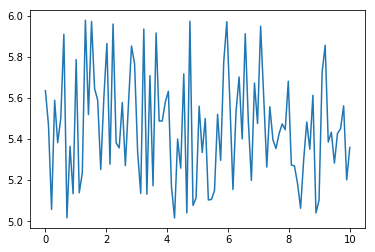

In [13]:
x = np.linspace(0, 10, 100)
y = np.random.random(100)+5
plt.plot(x,y)

A quick sin(x)^2 function

In [14]:
def f(x): return np.sin(x)**2

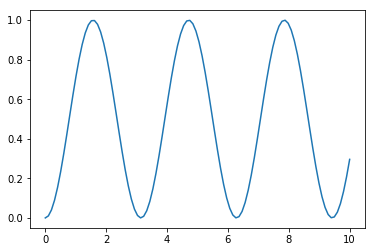

In [15]:
plt.plot(x, f(x))

## A linear regression 
Some linear Algebra...

In [16]:
n = 100

In [17]:
x = np.ones((n,2))
x[:,0] = np.random.uniform(-1, 1, 100)
x[:5]

array([[-0.53285057,  1.        ],
       [ 0.91257023,  1.        ],
       [ 0.51420861,  1.        ],
       [-0.29654208,  1.        ],
       [-0.70992089,  1.        ]])

In [18]:
a = np.array([3,2])

Matrixc multiplication is @ now in python 3.7

In [19]:
y = x @ a + np.random.uniform(-1,1, n)

In [20]:
y[0:5]

array([ 3.59974047e-03,  4.63000832e+00,  3.19561292e+00,  1.03623721e+00,
       -4.74254240e-01])

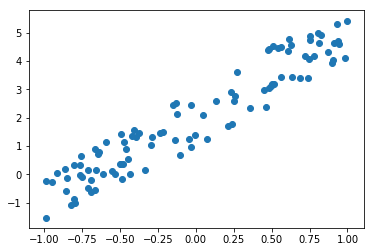

In [21]:
plt.scatter(x[:,0], y)

In [22]:
def l(x): return 3*x + 2

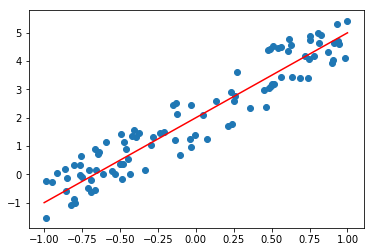

In [23]:
#The underlying linear function
x0 = np.linspace(-1,1,n)
plt.scatter(x[:,0], y)
plt.plot(x0, l(x0), color='r')

We will import the linear regressor from the sklearn library

In [24]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

Create a linear regressor

In [25]:
regr = linear_model.LinearRegression()

Fit the model to the data

In [26]:
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Let's check the model params

In [27]:
regr.coef_, regr.intercept_

(array([2.88131516, 0.        ]), 2.0505559365303627)

In [28]:
y_pred = regr.predict(x)

Some standard mesures of error

In [29]:
mse = mean_squared_error(y, y_pred)
print(f"Mean squared error: {mse:.2f}")

Mean squared error: 0.34


In [30]:
# Explained variance score: 1 is perfect prediction
r2 = r2_score(y, y_pred)
print(f'Variance score: {r2:.2f}')

Variance score: 0.90


# Pandas

pandas is a great library to work with tabular (Excel kind of) data.

In [31]:
import pandas as pd

The primary data structures in pandas are implemented as two classes:

- DataFrame, which you can imagine as a relational data table, with rows and named columns.
Series, which is a single column. A DataFrame contains one or more Series and a name for each Series.
- The data frame is a commonly used abstraction for data manipulation. Similar implementations exist in Spark and R.

One way to create a Series is to construct a Series object. For example:

In [32]:
pd.Series(['Paris', 'Chambery', 'Marseille'])

0        Paris
1     Chambery
2    Marseille
dtype: object

DataFrame objects can be created by passing a dict mapping string column names to their respective Series. If the Series don't match in length, missing values are filled with special NA/NaN values. Example:

In [33]:
city_names = pd.Series(['Paris', 'Chambery', 'Marseille'])
population = pd.Series([2201356, 73256, 105962])

In [34]:
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })

In [35]:
cities

,City name,Population
0,Paris,2201356
1,Chambery,73256
2,Marseille,105962


You can Load and entire file into a DataFrame

In [36]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")

Two useful methods to quickly get some info on a DataFrame are head and describe

In [37]:
california_housing_dataframe.head(5) #first 5 rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [38]:
california_housing_dataframe.describe() #stats per column

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Plotting is built into the pandas DataFrame class (behind the scene matplolib is called)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022DB2DAB208>]],
      dtype=object)

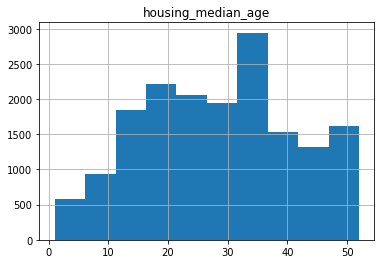

In [39]:
california_housing_dataframe.hist('housing_median_age')

## Accesing Data

In [40]:
cities['City name'] #gets column 'City name'

0        Paris
1     Chambery
2    Marseille
Name: City name, dtype: object

In addition, pandas provides an extremely rich API for advanced indexing and selection that is too extensive to be covered here.

In [41]:
cities['City name'][1]

'Chambery'

## Manipulating Data

We can also manipulate data

In [42]:
population/1000

0    2201.356
1      73.256
2     105.962
dtype: float64

Adding a column to our cities DataFrame is easy

In [43]:
cities['Area km2'] = pd.Series([253, 23, 97.92])

In [44]:
cities

,City name,Population,Area km2
0,Paris,2201356,253.00
1,Chambery,73256,23.00
2,Marseille,105962,97.92


## Importing Data

To nice trick to read time series: 
- `index_col` : let's you choose the column to use as index for the DataFrame
- `parse_dates` : Let's you automatically parse the column as a datetime object

In [118]:
data_df = pd.read_csv('data.csv', index_col='date', parse_dates=True)

In [119]:
data_df.columns

Index(['amb_temp', 'cell_temp', 'irradiance', 'dcPower'], dtype='object')

In [120]:
data_df.head()

,amb_temp,cell_temp,irradiance,dcPower
date,,,,
2017-10-01 00:00:00,12.600,8.700,0.0,0.0
2017-10-01 00:10:00,12.350,8.167,0.0,0.0
2017-10-01 00:20:00,12.367,8.500,0.0,0.0
2017-10-01 00:30:00,12.500,8.650,0.0,0.0
2017-10-01 00:40:00,11.900,8.167,0.0,0.0


In [121]:
data_df.describe()

,amb_temp,cell_temp,irradiance,dcPower
count,13104.000000,13104.000000,13104.000000,13104.000000
mean,8.015654,6.490477,70.393697,274.322039
std,5.439875,8.568432,141.032820,586.020234
min,-2.750000,-7.900000,0.000000,0.000000
25%,3.924750,0.891750,0.000000,0.000000
50%,7.100000,4.200000,0.000000,6.000000
75%,11.350000,9.000000,63.999997,168.999998
max,26.900000,40.600000,814.000000,2954.000000


In [122]:
data_df.index

DatetimeIndex(['2017-10-01 00:00:00', '2017-10-01 00:10:00',
               '2017-10-01 00:20:00', '2017-10-01 00:30:00',
               '2017-10-01 00:40:00', '2017-10-01 00:50:00',
               '2017-10-01 01:00:00', '2017-10-01 01:10:00',
               '2017-10-01 01:20:00', '2017-10-01 01:30:00',
               ...
               '2017-12-30 22:20:00', '2017-12-30 22:30:00',
               '2017-12-30 22:40:00', '2017-12-30 22:50:00',
               '2017-12-30 23:00:00', '2017-12-30 23:10:00',
               '2017-12-30 23:20:00', '2017-12-30 23:30:00',
               '2017-12-30 23:40:00', '2017-12-30 23:50:00'],
              dtype='datetime64[ns]', name='date', length=13104, freq=None)

Sadly, only 2 months... I will need to hire `Jose` to get more "clean" data...

In [123]:
data_df['10-2017']

,amb_temp,cell_temp,irradiance,dcPower
date,,,,
2017-10-01 00:00:00,12.600,8.700,0.0,0.0
2017-10-01 00:10:00,12.350,8.167,0.0,0.0
2017-10-01 00:20:00,12.367,8.500,0.0,0.0
2017-10-01 00:30:00,12.500,8.650,0.0,0.0
2017-10-01 00:40:00,11.900,8.167,0.0,0.0
2017-10-01 00:50:00,12.000,7.800,0.0,0.0
2017-10-01 01:00:00,12.200,8.050,0.0,0.0
2017-10-01 01:10:00,12.200,8.567,0.0,0.0
2017-10-01 01:20:00,12.200,8.950,0.0,0.0


Visualise some data with `plot` directly from the timeseries.

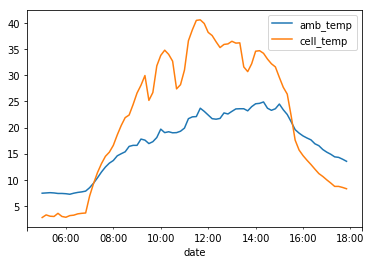

In [124]:
data_df[['amb_temp', 'cell_temp']]['05h 13-Oct-2017': '17h 13-Oct-2017'].plot()

Easily resample

In [125]:
data1h = data_df.resample('1h', label='right', closed='right').mean()

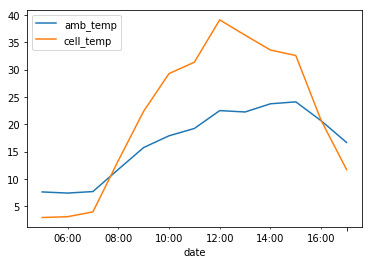

In [126]:
data1h[['amb_temp', 'cell_temp']]['05h 13-Oct-2017': '17h 13-Oct-2017'].plot()

## Let's make a model to predict dcPower
We will use a Random Forest regressor, it is a simple but powerful model

In [127]:
from sklearn.ensemble import RandomForestRegressor

Let's define training and validation sets, let's predict on saturdays...

In [128]:
idx_train = data_df.index.dayofweek!=6
idx_val = data_df.index.dayofweek==6

Or the last 2 week of the year

In [129]:
idx_train = data_df.index.week < 51
idx_val = data_df.index.week >= 51

In [130]:
idx_train

array([ True,  True,  True,  True, ..., False, False, False, False])

In [131]:
len(idx_train)

13104

We have to prepare the data

In [132]:
train = data_df[idx_train].drop('dcPower', axis=1)  #remove the dependent variable from the DF
y_train = data_df['dcPower'][idx_train]

val = data_df[idx_val].drop('dcPower', axis=1)
y_val = data_df['dcPower'][idx_val]

Create and fit the model

In [133]:
m = RandomForestRegressor(100)
m.fit(train, y_train)
m.score(train, y_train), m.score(val, y_val)

(0.9979668069835088, 0.9347796571974596)

It's not bad at all! Let's compute the predictions on validation set

In [134]:
preds = m.predict(val)

In [135]:
res = pd.concat([pd.Series(data = preds, index=y_val.index), y_val], axis=1)
res.columns = ['model', 'dcPower']

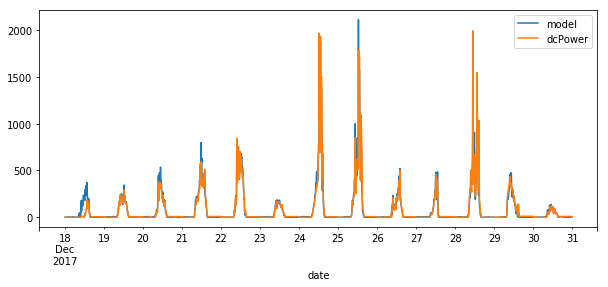

In [136]:
res.plot(figsize=(10,4))

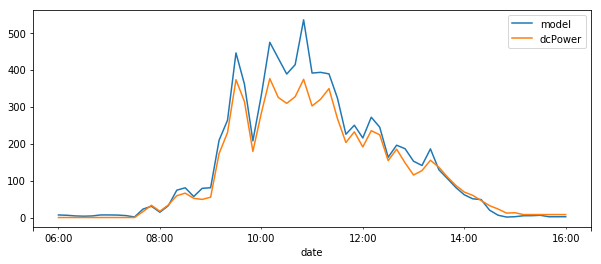

In [137]:
res['6:00 12-20-2017':'16:00 12-20-2017' ].plot(figsize=(10,4))

it's not perfect, but it is a good start without any setup.

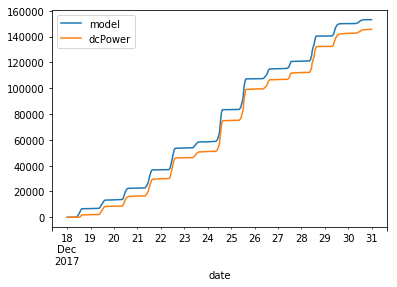

In [138]:
res.cumsum().plot()

## Exercise: Make a Random Forest regressor for the california DataFrame to predict housing value

In [67]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [68]:
len(california_housing_dataframe)

17000

sklearn has a function to split randomly the train/valid/test data

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X = california_housing_dataframe.drop(columns='median_house_value')
y = california_housing_dataframe.median_house_value
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [71]:
cal_rf = RandomForestRegressor(n_estimators=100)
cal_rf.fit(X_train, y_train)
cal_rf.score(X_train, y_train), cal_rf.score(X_test, y_test)

(0.9753029842573192, 0.8098747706864099)

In [72]:
#RMSE to compare later with DL model
def rmse(x,y): return np.sqrt(((x-y)**2).mean())

rmse(cal_rf.predict(X_test), y_test)

50708.91080554904

## It's a big number, let's compute the relative error

In [73]:
def rmspe(x,y): return np.sqrt(((x-y)**2/y**2).mean())

In [74]:
rmspe(cal_rf.predict(X_test), y_test)

0.4437438760574647

To learn more about Random Forest, check the [ML](https://course.fast.ai/ml.html) course in fast.ai

# Let's do some Deep Learning

In [75]:
from fastai import *          # Quick accesss to most common functionality
from fastai.tabular import *  # Quick accesss to tabular functionality

In [76]:
california_housing_dataframe.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

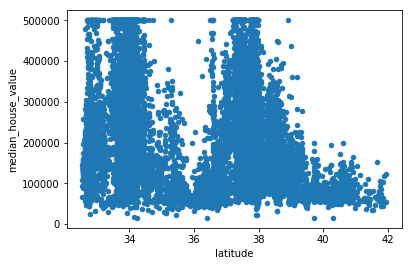

In [77]:
california_housing_dataframe.plot.scatter(x='latitude', y='median_house_value')

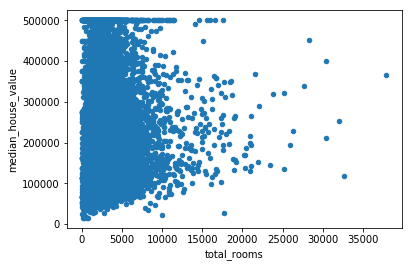

In [78]:
california_housing_dataframe.plot.scatter(x='total_rooms', y='median_house_value')

A linear Regression is not going to cut it

In [79]:
california_housing_dataframe['latitude2']=pd.cut(california_housing_dataframe.latitude, bins=[30,33,35,37,39,41,43])

In [80]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,latitude2
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,"(33, 35]"
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,"(33, 35]"
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,"(33, 35]"
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,"(33, 35]"
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,"(33, 35]"


Spcify the variables to use for the model

In [81]:
dep_var = 'median_house_value'
cat_names = []
cont_names = ['latitude','longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']

FillMissing will resolve issues with missing values and Normalize will scale the input variables to value sbetween -1 and 1

In [82]:
procs = [FillMissing, Normalize]

`TabularList` is a class that handle Columnar/Tabular data, the API is block based, so:
- `from_df` instantiates the class, 
- `random_split_by_pct` makes the train/valid split by percentage 0.2, 
- `label_from_df` how to label the inputs, using the info from the DataFrame
- `databunch` creates the dataloader for the training.

In [83]:
data = (TabularList.from_df(california_housing_dataframe, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .random_split_by_pct(0.2)
                           .label_from_df(cols=dep_var, label_cls=FloatList, log=True)
                           .databunch())

We define some values to help the train loop to converge, it is good practice to scale continouos output variables with log (as we are using ExpRMSE)

In [84]:
max_log_y = np.log(np.max(california_housing_dataframe[dep_var])*1.2)
y_range = torch.tensor([0, max_log_y], device=defaults.device)

The class `tabular_learner` creates the model and the learner for our databunch.

In [85]:
learn = tabular_learner(data, layers=[1000,500], emb_szs={}, 
                        y_range=y_range, metrics=exp_rmspe)

In [86]:
learn.model

TabularModel(
  (embeds): ModuleList()
  (emb_drop): Dropout(p=0.0)
  (bn_cont): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=8, out_features=1000, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=1000, out_features=500, bias=True)
    (4): ReLU(inplace)
    (5): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=500, out_features=1, bias=True)
  )
)

`fit_one_cycle` is a sophisticated training schedule that converges very fast (Leslie Smith)

In [90]:
learn.fit_one_cycle(3, 1e-3)

epoch,train_loss,valid_loss,exp_rmspe
1,0.149364,0.130591,0.479542
2,0.116979,0.114316,0.369471
3,0.093047,0.117084,0.347993


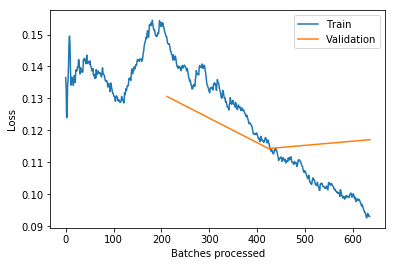

In [91]:
learn.recorder.plot_losses()

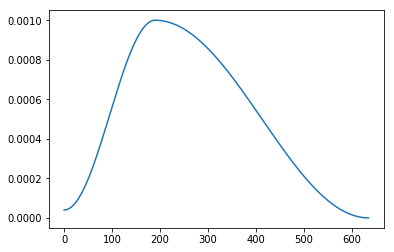

In [92]:
learn.recorder.plot_lr()

# DL for bifacial

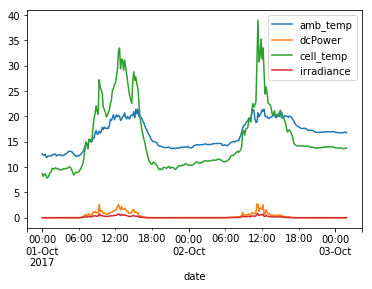

In [222]:
data_df.iloc[0:300].plot()

In [223]:
data_df.head()

,amb_temp,dcPower,cell_temp,irradiance
date,,,,
2017-10-01 00:00:00,12.600,0.0,8.700,0.0
2017-10-01 00:10:00,12.350,0.0,8.167,0.0
2017-10-01 00:20:00,12.367,0.0,8.500,0.0
2017-10-01 00:30:00,12.500,0.0,8.650,0.0
2017-10-01 00:40:00,11.900,0.0,8.167,0.0


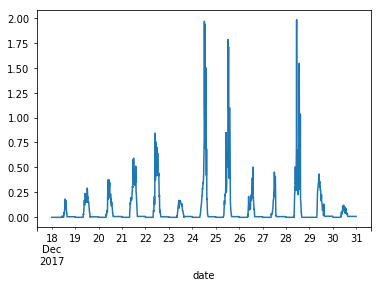

In [225]:
data_df['dcPower'].iloc[idx_val].plot()

In [238]:
dep_var = 'dcPower'
cat_names = []
cont_names = ['cell_temp', 'amb_temp', 'irradiance']

procs = [Normalize]

data = (TabularList.from_df(data_df, cat_names=cat_names, cont_names=cont_names, procs=procs)
        .split_by_idx(idx_val)
        .label_from_df(cols=dep_var, label_cls=FloatList)
        .databunch(bs=16)
       )

max_log_y = np.log(np.max(1+data_df[dep_var])*1.2)
y_range = torch.tensor([0, 3], device=defaults.device)

In [317]:
def r2(p,t):
    p = p.view(-1,)
    ss_tot = ((t-t.mean())**2).sum()
    ss_res = ((t-p)**2).sum()
    return 1 - ss_res/ss_tot

In [318]:
learn = tabular_learner(data, layers=[500,300,300], emb_szs={},
                        y_range=y_range, metrics=r2)

In [240]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


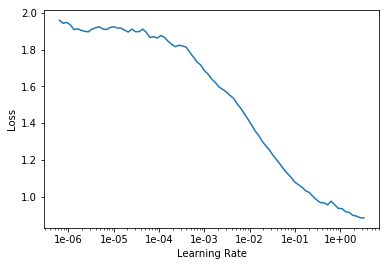

In [241]:
learn.recorder.plot()

In [319]:
learn.fit_one_cycle(10, 1e-2)

epoch,train_loss,valid_loss,r2
1,0.035828,0.003929,-inf
2,0.039697,0.005364,-inf
3,0.033391,0.003401,-inf
4,0.020582,0.014725,-inf
5,0.025004,0.007592,-inf
6,0.019339,0.006519,-inf
7,0.018201,0.008200,-inf
8,0.016702,0.007955,-inf
9,0.013111,0.004128,-inf
10,0.014319,0.005833,-inf


In [293]:
p,t = learn.get_preds()

In [294]:
p,t

(tensor([[0.0510],
         [0.0201],
         [0.0201],
         ...,
         [0.0194],
         [0.0192],
         [0.0205]]),
 tensor([0.0000, 0.0000, 0.0000,  ..., 0.0090, 0.0090, 0.0090]))

In [295]:
t

tensor([0.0000, 0.0000, 0.0000,  ..., 0.0090, 0.0090, 0.0090])

In [296]:
data_df.dcPower.iloc[idx_val].head()

date
2017-12-18 00:00:00    0.0
2017-12-18 00:10:00    0.0
2017-12-18 00:20:00    0.0
2017-12-18 00:30:00    0.0
2017-12-18 00:40:00    0.0
Name: dcPower, dtype: float64

In [297]:
p_np, t_np = to_np(p),to_np(t) 

In [298]:
p_np[:,0]

array([0.051037, 0.020076, 0.020076, 0.020302, ..., 0.0186  , 0.019402, 0.019243, 0.020525], dtype=float32)

In [299]:
res_dl = pd.DataFrame(data=np.array([p_np[:,0], t_np]).T, columns = ['model', 'dcPower'], index=data_df.dcPower.iloc[idx_val].index)


In [300]:
res_dl.head()

,model,dcPower
date,,
2017-12-18 00:00:00,0.051037,0.0
2017-12-18 00:10:00,0.020076,0.0
2017-12-18 00:20:00,0.020076,0.0
2017-12-18 00:30:00,0.020302,0.0
2017-12-18 00:40:00,0.021914,0.0


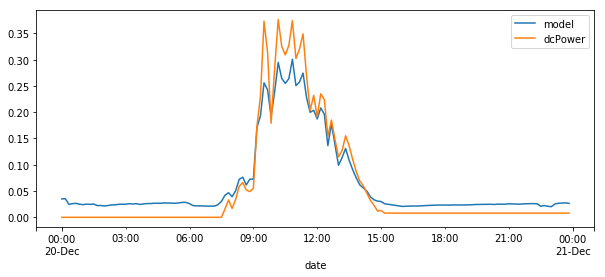

In [301]:
res_dl['12-20-2017'].plot(figsize=(10,4))

In [320]:
r2(p,t)

tensor(0.7937)

In [321]:
data_df.columns

Index(['amb_temp', 'dcPower', 'cell_temp', 'irradiance'], dtype='object')